In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("cleaned_data/reviews_cleaned.csv")

# Convert values
columns_to_convert = ['review_score', 'positive', 'negative', 'recommendations',
                      'metacritic_score', 'steamspy_user_score']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].replace('\\N', pd.NA), errors='coerce')

df = df.dropna(subset=columns_to_convert)

# Split the data
X = df[['positive', 'negative', 'recommendations', 'metacritic_score', 'steamspy_user_score']]
y = df['review_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

C:\Users\ajcru\AppData\Local\Temp\ipykernel_21312\979098242.py:7: DtypeWarning: Columns (1,3,4,5,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_data/reviews_cleaned.csv")


Coefficients: [ 3.44064095e-06 -3.85662708e-05  9.26191312e-07  7.36300049e-02
  9.66556155e-03]
Intercept: 1.706539397891988
Mean Squared Error: 1.2100633602361481
R² Score: 0.34843984814379314


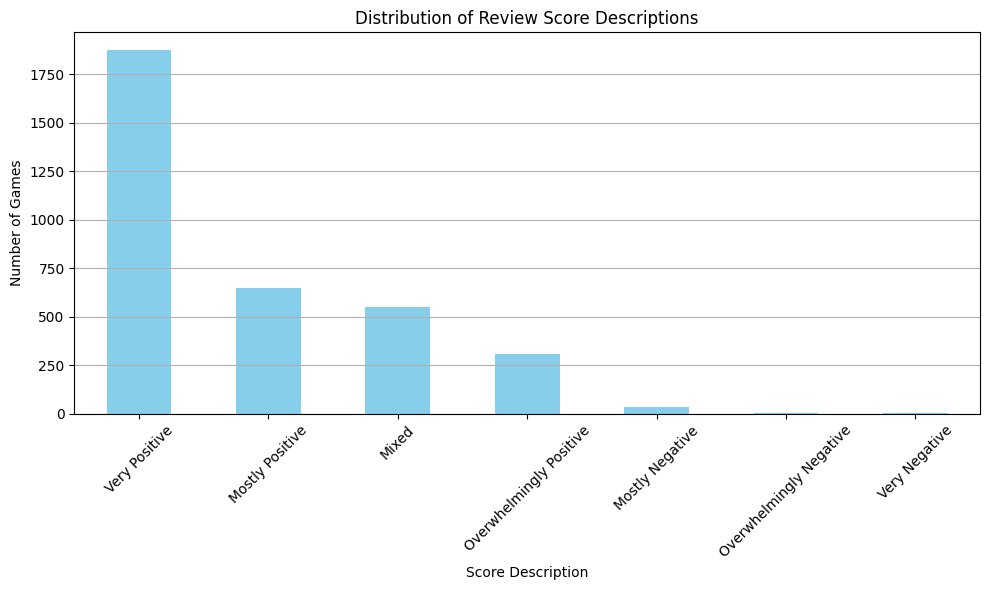

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['review_score_description'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Review Score Descriptions")
plt.xlabel("Score Description")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



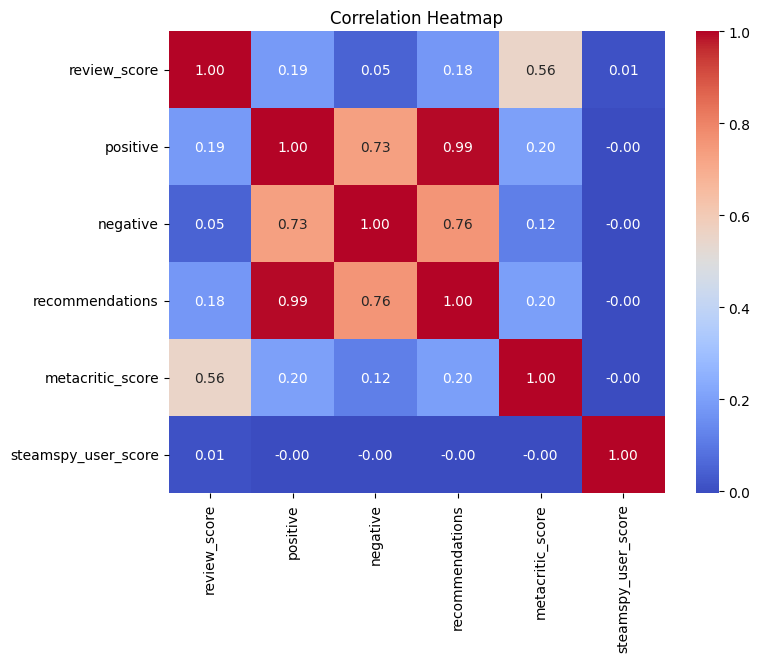

In [3]:
import seaborn as sns

corr = df[['review_score', 'positive', 'negative', 'recommendations', 
           'metacritic_score', 'steamspy_user_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


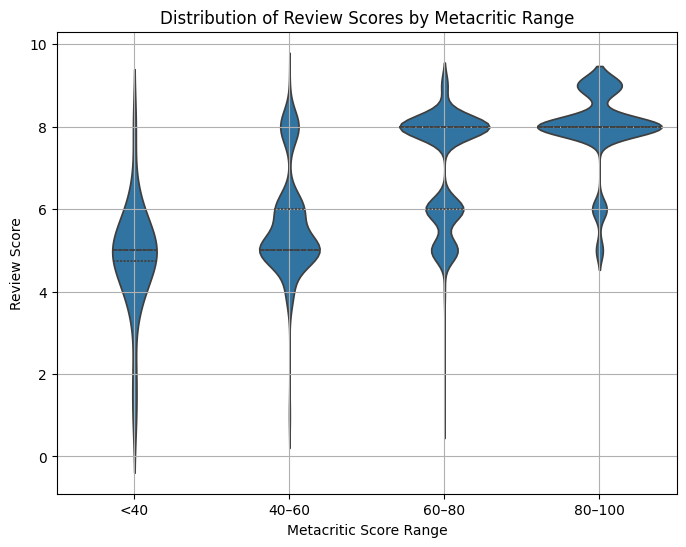

In [4]:

df['metacritic_bin'] = pd.cut(df['metacritic_score'], bins=[0, 40, 60, 80, 100],
                               labels=['<40', '40–60', '60–80', '80–100'])

plt.figure(figsize=(8, 6))
sns.violinplot(x='metacritic_bin', y='review_score', data=df, inner="quartile")
plt.title("Distribution of Review Scores by Metacritic Range")
plt.xlabel("Metacritic Score Range")
plt.ylabel("Review Score")
plt.grid(True)
plt.show()
